In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy.linalg import inv
from ipywidgets import interactive
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

# 1 Visualize Regularization Contours

### i) Regularization Contourplots

(40, 40)


Text(0.5, 1.0, 'Lasso')

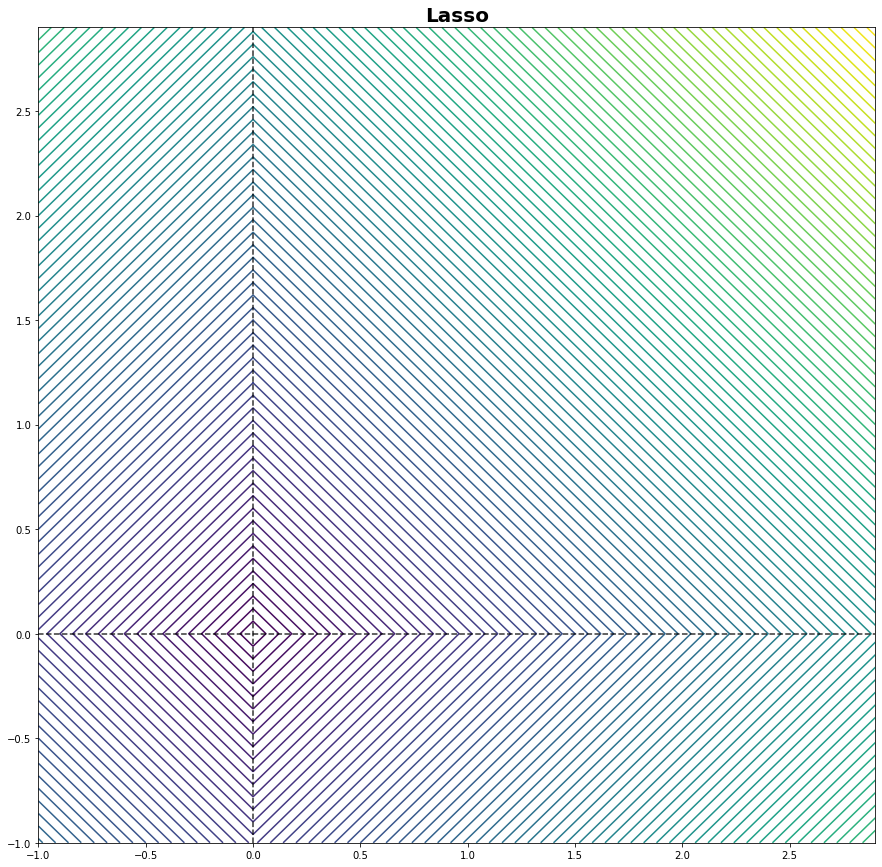

In [3]:
b1 = np.arange(-1, 3, 0.1)
b2 = np.arange(-1, 3, 0.1)
B1, B2 = np.meshgrid(b1, b2)
print(np.shape(B1))
L1 = np.abs(B1) + np.abs(B2)
plt.contour(B1, B2, L1, levels=100)
#plt.contourf(B1, B2, L1, levels=100)
plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
plt.title("Lasso", fontweight="bold", fontsize=20)

Text(0.5, 1.0, 'Ridge')

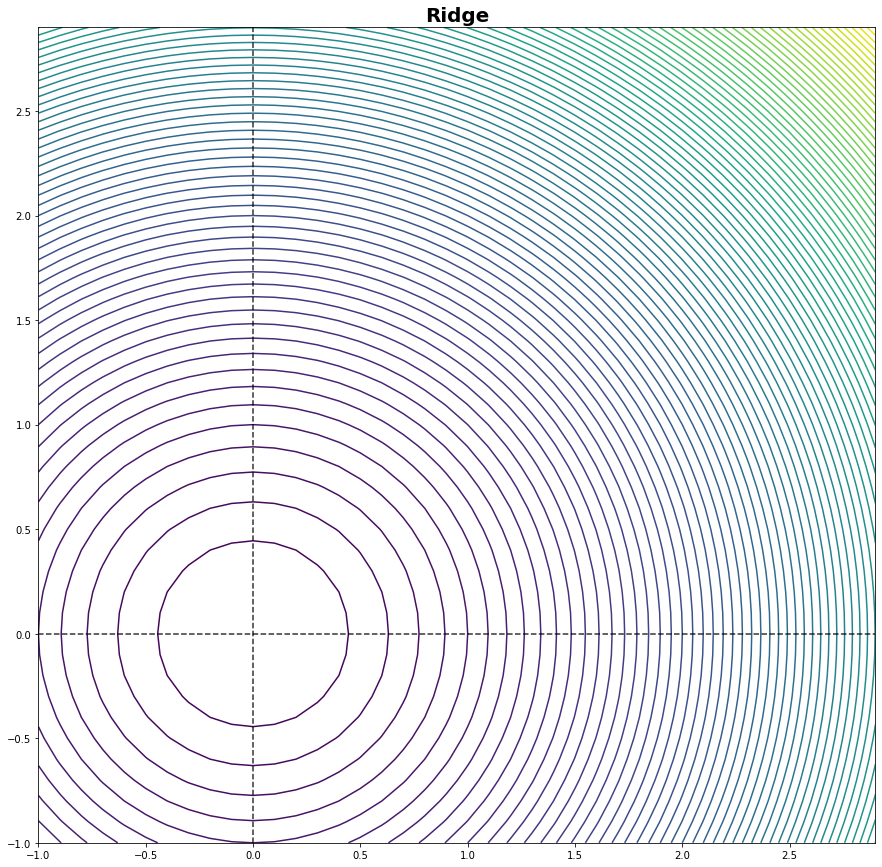

In [4]:
L2 = B1**2 + B2**2
plt.contour(B1, B2, L2, levels=100)
plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
plt.title("Ridge", fontweight="bold", fontsize=20)

### ii) SSQ Contourplot

1200.4715141816023


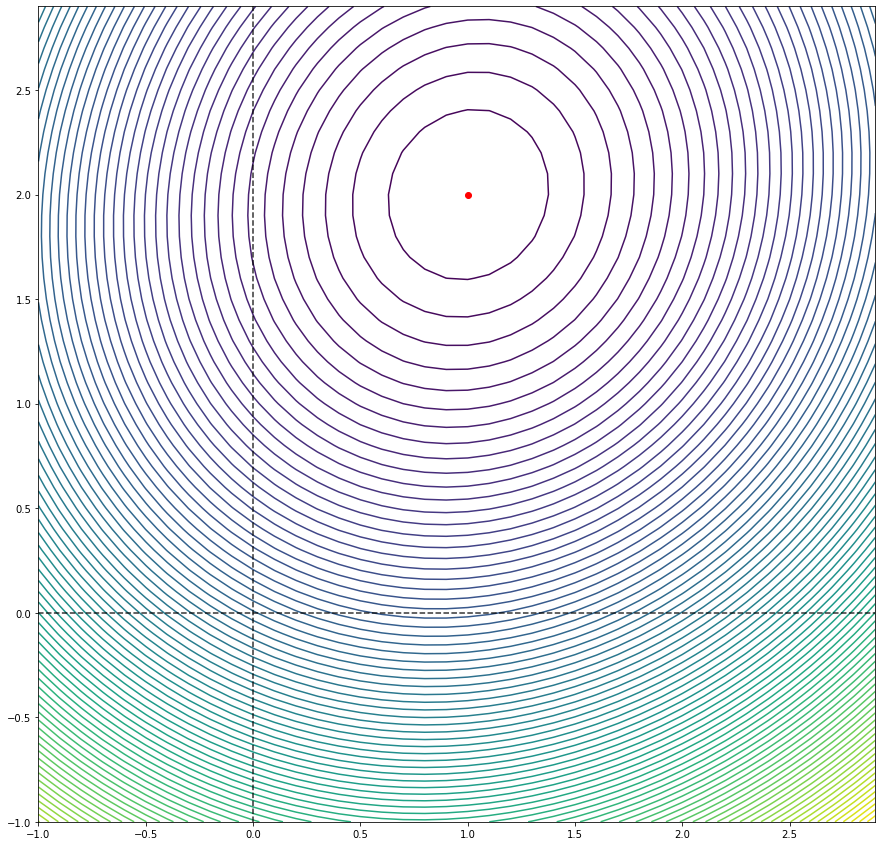

In [5]:
N = 100
X1 = np.random.randn(N)
X2 = np.random.randn(N)
Y = 1 * X1 + 2 * X2 + 0.1 * np.random.randn(N)
X = np.vstack([X1, X2])
Y = Y[None]
np.savez("sheet5-linreg1.npz", X=X, Y=Y)


b1 = np.arange(-1, 3, 0.1)
b2 = np.arange(-1, 3, 0.1)
B1, B2 = np.meshgrid(b1, b2)
B = np.vstack((B1.reshape(-1), B2.reshape(-1)))
SSQ = np.sum((B.T.dot(X) - Y)**2, 1).reshape(len(b1), len(b2)) 
print(SSQ.max())
plt.contour(B1, B2, SSQ, levels=100)
plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
plt.scatter(1,2, color="red")


### iii) Ridge Loss Function

In [6]:
def f(reg):
    plt.contour(B1, B2, SSQ + reg*L2, levels=100)
    plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
    plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
    m = np.unravel_index(np.argmin(SSQ + reg * L2, axis=None), SSQ.shape) # Somehow this is transposed?
    plt.scatter(1,2, color="red")
    plt.scatter(b1[m[1]],b2[m[0]], color="orange")
    plt.show()

interactive_plot = interactive(f, reg=(0,300, 20))
interactive_plot

interactive(children=(IntSlider(value=140, description='reg', max=300, step=20), Output()), _dom_classes=('wid…

In [7]:
def g(reg):
    plt.contour(B1, B2, SSQ + reg*L1, levels=100)
    plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
    plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
    m = np.unravel_index(np.argmin(SSQ + reg * L1, axis=None), SSQ.shape)
    plt.scatter(1,2, color="red")
    plt.scatter(b1[m[1]],b2[m[0]], color="orange")
    plt.show()

interactive_plot = interactive(g, reg=(0,300, 20))
interactive_plot

interactive(children=(IntSlider(value=140, description='reg', max=300, step=20), Output()), _dom_classes=('wid…

### v) Highly correlated features

2015.1942045863607


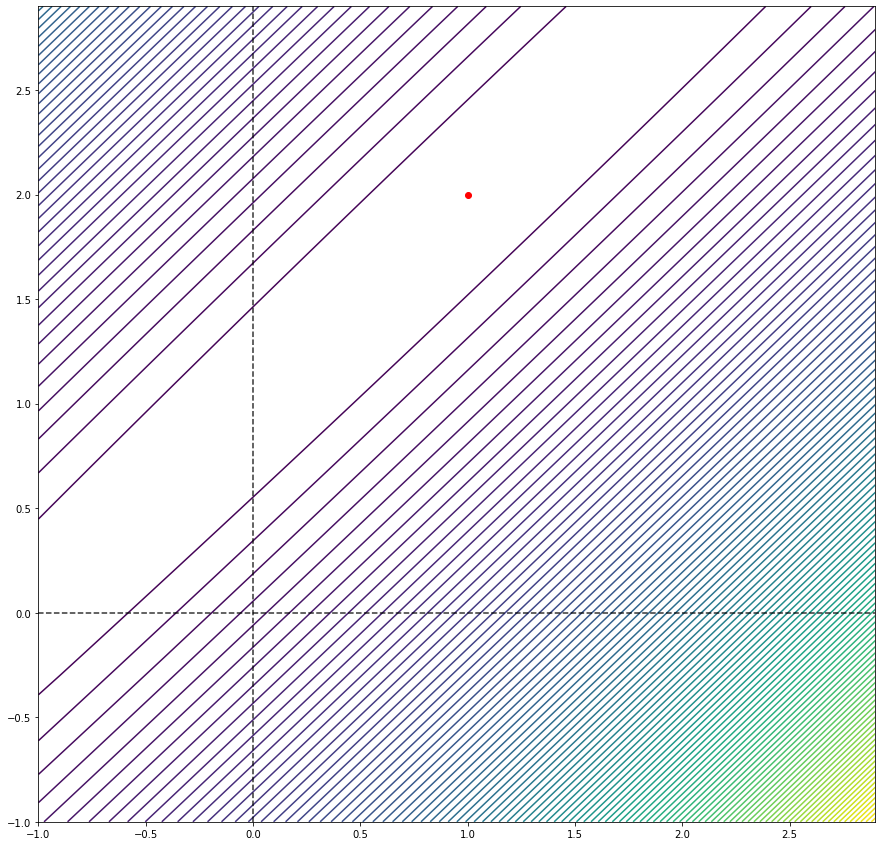

In [8]:
N = 100
X1 = np.random.randn(N)
X2 = -X1 + 0.1 * np.random.randn(N)
Y = 1 * X1 + 2 * X2 + 0.1 * np.random.randn(N)
X = np.vstack([X1, X2])
Y = Y[None]
np.savez("sheet5-linreg2.npz", X=X, Y=Y)


b1 = np.arange(-1, 3, 0.1)
b2 = np.arange(-1, 3, 0.1)
B1, B2 = np.meshgrid(b1, b2)
B = np.vstack((B1.reshape(-1), B2.reshape(-1)))
SSQ = np.sum((B.T.dot(X) - Y)**2, 1).reshape(len(b1), len(b2)) 
print(SSQ.max())
plt.contour(B1, B2, SSQ, levels=100)
plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
plt.scatter(1,2, color="red")

In [9]:
def f(reg):
    plt.contour(B1, B2, SSQ + reg*L2, levels=100)
    plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
    plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
    m = np.unravel_index(np.argmin(SSQ + reg * L2, axis=None), SSQ.shape) # Somehow this is transposed?
    plt.scatter(1,2, color="red")
    plt.scatter(b1[m[1]],b2[m[0]], color="orange")
    plt.show()

interactive_plot = interactive(f, reg=(0,300, 20))
interactive_plot

interactive(children=(IntSlider(value=140, description='reg', max=300, step=20), Output()), _dom_classes=('wid…

In [10]:
def g(reg):
    plt.contour(B1, B2, SSQ + reg*L1, levels=100)
    plt.axhline(0, color="black", linestyle="dashed", alpha=0.8)
    plt.axvline(0, color="black", linestyle="dashed", alpha=0.8)
    m = np.unravel_index(np.argmin(SSQ + reg * L1, axis=None), SSQ.shape)
    plt.scatter(1,2, color="red")
    plt.scatter(b1[m[1]],b2[m[0]], color="orange")
    plt.show()

interactive_plot = interactive(g, reg=(0,300, 20))
interactive_plot

interactive(children=(IntSlider(value=140, description='reg', max=300, step=20), Output()), _dom_classes=('wid…

#  3 Fitting a 1D Gaussian Process

In [5]:
from numpy.linalg import cholesky
Xseq = np.arange(0,12,0.01)
def f(x): return np.cos(x) / 2

In [6]:
def K(x, xp, lengthscale=1.0):
    dist = (x[:,None] - xp[None])**2
    return np.exp(-dist/(2*lengthscale))

### i) Plotting samples from the prior

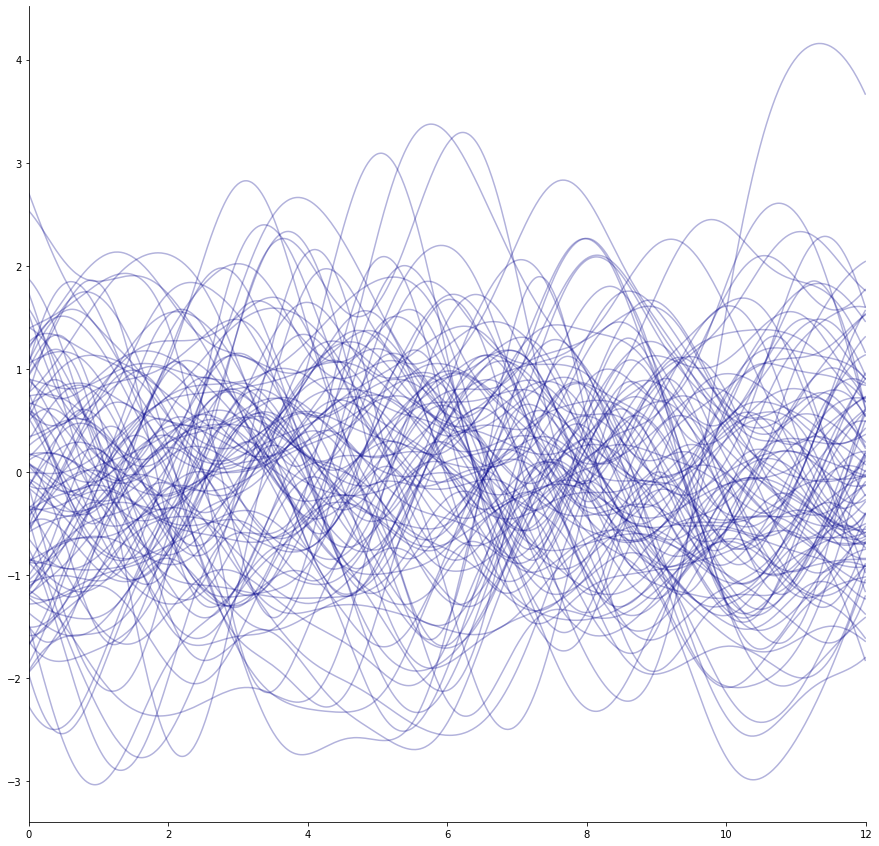

In [7]:
L = cholesky(K(Xseq, Xseq, 1) + 1e-8 * np.eye(len(Xseq))) # needed for numerical stability
for _ in range(100):
    y = L.dot(np.random.randn(len(Xseq)))
    plt.plot(Xseq, y, color="darkblue", alpha=0.3)
plt.xlim(0, 12)
sns.despine()

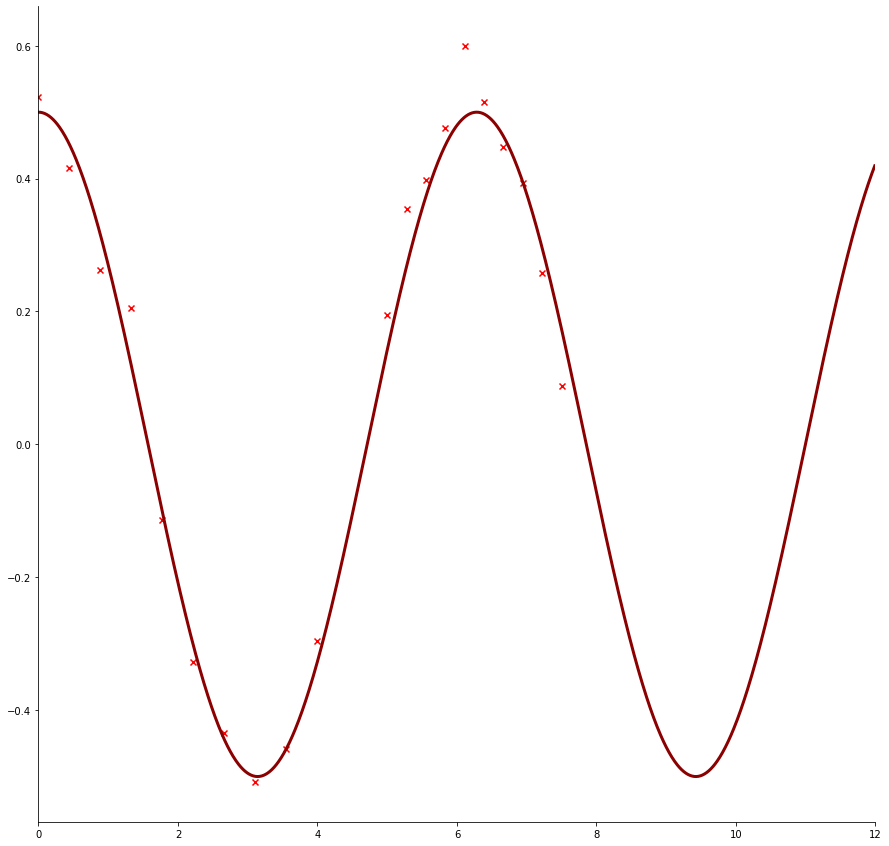

In [8]:
# Function roughly follows the autograd example (see https://github.com/HIPS/autograd/blob/master/examples/gaussian_process.py)
#X = np.concatenate([np.linspace(0, 4, num=10),
#                              np.linspace(5, 7.5, num=10)])
#Y = (np.cos(X) + np.random.randn(n_data) * 0.1) / 2.0
#np.savez("gp-data", X=X, Y=Y)
tmp = np.load("gp-data.npz")
X = tmp["X"]
Y = tmp["Y"]
plt.xlim(0, 12)
plt.plot(Xseq, f(Xseq), color="darkred", linewidth=3)
plt.scatter(X, Y, color="red", marker="x")
sns.despine()

In [9]:
def GP_fit(x_obs, x_pred, y_obs, l=1.0, noise=1e-5):
    Kpo = K(x_pred, x_obs, l)
    Koo = K(x_obs, x_obs, l)
    Kop = Kpo.T
    Kpp = K(x_pred, x_pred, l)
    noise = np.maximum(1e-8, noise)
    inverse = inv(Koo + noise * np.eye(Koo.shape[0]))
    pred_mean = Kpo.dot(inverse).dot(y_obs)
    pred_cov = Kpp - Kpo.dot(inverse).dot(Kop)
    return pred_mean, pred_cov

In [10]:

def g(N):
    indices = np.random.permutation(20)[:N]
    pred_mean, pred_cov = GP_fit(X[indices], Xseq, Y[indices], 5.0, 0.01)

    L = cholesky(pred_cov + 1e-8 * np.eye(len(Xseq))) # needed for numerical stability
    for _ in range(50):
        y = pred_mean + L.dot(np.random.randn(len(Xseq)))
        plt.plot(Xseq, y, color="darkblue", alpha=0.2)
    plt.xlim(0, 12)
    plt.ylim(-1,1)
    plt.plot(Xseq, f(Xseq), color="darkred", linewidth=3)  # ground truth
    plt.plot(Xseq, pred_mean, color="orange", linewidth=3)
    plt.scatter(X[indices], Y[indices], color="red", marker="x", linewidth=20)
    sns.despine()

interactive(g, N=(1,20,1))

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

Larger lengthscales make everything smoother and reduce the uncertainty in the unobserved spaces.

In [11]:
# If you prefer the fill-between version
N = 10;
def g2(l):
    indices = np.random.permutation(20)[:N]
    pred_mean, pred_cov = GP_fit(X[indices], Xseq, Y[indices], l, 0.0001)

    std = np.sqrt(np.diag(pred_cov).reshape(-1))
    plt.xlim(0, 12)
    # plt.ylim(-1,1)
    plt.plot(Xseq, f(Xseq), color="darkred", linewidth=3)
    plt.plot(Xseq, pred_mean, color="orange", linewidth=3)
    plt.fill_between(Xseq, pred_mean - 3*std, pred_mean + 3*std, color="gray", alpha=0.5)
    plt.scatter(X[indices], Y[indices], color="red", marker="x", linewidth=20)
    sns.despine()
    
interactive(g2, l=[0.01,  0.1, 0.5, 1, 5, 100])

interactive(children=(Dropdown(description='l', options=(0.01, 0.1, 0.5, 1, 5, 100), value=0.01), Output()), _…